---
# Ejercicio 9
Escriba tres programas para generar un variable aleatoria normal patrón, usando:

**a)** generación de variables exponenciales según el ejemplo 5 f del libro Simulacion de S. M. Ross,

**b)** el método polar,

**c)** el método de razón entre uniformes

Pruebe los códigos calculando la media muestral y varianza muestral de 10.000 valores generados con los
tres métodos.

Inicialmente tenemos que la densidad de una variable aleatoria con distribución normal es tal que:
$$
f(x) = \frac{2}{\sqrt{2\pi}} \cdot e^{\frac{-x²}{2}} \quad 0<x<\infty
$$

In [3]:
from typing import Callable
from random import random
from time import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import log, e, pi, cos, sin, sqrt
sns.set_theme(style="darkgrid")

---
# Método de rechazo

Fuente 🌎: [Simulación - Sheldon M. Ross](https://eprints.uad.ac.id/13/1/Sheldon_M._Ross_-_Simulation.pdf)

Para el punto **a)**, "Utilizando la generación de variables exponenciales", no es nada más que generar una normal patrón, utilizando el método de rechazo donde $g(x)=e^x, \quad 0<x<\infty$; $g$ función de densidad exponencial con tasa 1.


Sea $h(x) = \frac{f(x)}{g(x)}$ tal que:
$$
h(x) = \sqrt{\frac{2}{\pi}} e^{x-\frac{x^2}{2}}
$$

Luego el *valor máximo de x*, se encuentra cuando maximizamos $x-\frac{x²}{2}$

El cálculo muestra que esto ocurre cuando $x=1$, y entonces podemos tomar:
$$
c = max\frac{f(x)}{g(x)} = \frac{f(1)}{g(1)}=\sqrt{\frac{2e}{\pi}}
$$

Porque
$$
\begin{align*}
    \frac{f(x)}{cg(x)} &= exp\bigg\{x-\frac{x²}{2}-\frac{1}{2}\bigg\}\\[0.4cm]
    &= exp\bigg\{-\frac{(x-1)²}{2}\bigg\}
\end{align*}
$$

Luego el método de rechazo simula $Y_1 \thicksim \mathcal{E}(1), U$ uniforme, e itera hasta que:
$$
U \leq exp\bigg\{-\frac{(Y_1-1)²}{2}\bigg\}
$$

es decir:
$$
log(U) \leq -\frac{(Y_1 -1)^2}{2} \text{ o equivalentemente} -log \geq \frac{(Y_1 - 1)²}{2}
$$

Como $Y_2 = -log(U)$ genera una exponencial $\mathcal{E}(1)$, el algoritmo por el método de rechazo para generar Z se traduce en:

In [4]:
def ZMR(mu:float, sigma:float) -> float:
    """
    Generación de variable aleatoria con distribución normal

    Args:
        mu (float): Parámetro de la distribución
        sigma (float): Parámetro de la distribución

    Returns:
        float: Valor aleatorio
    """
    while True:
        Y1 = -log(random())
        Y2 = -log(random())
        if Y2 >= (Y1-1) ** 2 / 2:
            if random() < 0.5:
                return Y1 * sigma + mu
            return -Y1 * sigma + mu

---
# Método polar


In [5]:
def PolarMethod(mu:float, sigma:float) -> tuple[float, float]:
    """
    Generación de variable aleatoria con distribución normal
    Por el método Polar

    Args:
        mu (float): Parámetro de la distribución
        sigma (float): Parámetro de la distribución

    Returns:
        tuple[float, float]: Punto aleatorio
    """
    Rsquare = -2 * log(1 - random())
    Theta = 2 * pi * random() 
    X = sqrt(Rsquare) * cos(Theta)
    Y = sqrt(Rsquare) * sin(Theta)
    return (X * sigma + mu, Y * sigma + mu)

---
# Método de razón entre uniformes


Queremos generar una variable aleatoria con distro. uniforme. En primer momento veamos el caso particular de una Normal estándar, tal que:

$$
Z \sim \mathcal{N} (0, 1) \quad \text{ donde su densidad es: } f(x) = \frac{1}{\sqrt{2\pi}}\cdot e^{-\frac{x^2}{2}} 
$$

Ahora consideremos al siguiente conjunto:
$$
\begin{align*}
    C_f &= \bigg\{(u, v) \quad  |  \quad 0 < u < \sqrt{f\bigg(\frac{v}{u}\bigg)}\bigg\} \quad \text{donde } (u,v) \thicksim \text{Uniforme en }C_f\\[0.4cm]
        &= \bigg \{(u, v) \quad |  \quad 0 < u < \sqrt{\frac{1}{\sqrt{2\pi}}\cdot e^{-\frac{v^2}{2u²}}}\bigg \} \quad \text{Luego }\frac{v}{u} \text{ tiene densidad f}
\end{align*}
$$

Buscamos acotar el conjunto, para ello buscamos cotas para $u$ y $v$:

$$
\begin{align*}
    0 < u < \sqrt{\frac{1}{\sqrt{2\pi}}\cdot e^{-\frac{x^2}{2}}} \equiv 0 < u < \frac{1}{\sqrt[4]{2\pi}} \cdot 
    e^{-\frac{v^2}{2u^2}}, \quad \text{Llamemos } c = \sqrt[4]{2\pi}\\[0.4cm]
\end{align*}
    \\[0.4cm]
    0 < c\cdot u < e^{-\frac{v^2}{2u^2}}, \quad \text{multiplicamos por c}\\[0.4cm]
    ln(0) \longmapsto \infty < ln(c\cdot u) < -\frac{v²}{2u²}, \quad \text{aplico ln} \\[0.4cm]
    2u² \cdot ln(c\cdot u) < -v² \Longrightarrow v² < -2u² \cdot ln(c \cdot u)
$$

Para acotar $u$, necesitamos que $-ln(c\cdot u) > 0$ i.e $\quad c\cdot u < 1 \Longrightarrow u < \frac{1}{c}$

Esto nos da una cota para $u$:
$$
0 < u < \frac{1}{c}
$$

Para acotar $v$, notamos que:
$$
v² < -2\cdot u² \cdot ln(c\cdot u)
$$
Luego buscamos el valor máximo de $g(u) = -2 u² \cdot ln(c\cdot u)$

$$
\begin{align*}
    g'(u) &= -2 \cdot (2u\cdot ln(c\cdot u) + u² \cdot \frac{1}{c\cdot u} \cdot c)\\[0.4cm]
    &= -2u \cdot (2ln(c\cdot u) + 1)
\end{align*}
$$

Como $u\neq 0 \Longrightarrow $ ver cuando $g'(u) = 0$
$$
2ln(c\cdot u ) + 1 = 0 \Longrightarrow c\cdot u = e^{-\frac{1}{2}} \Longrightarrow u = \frac{1}{c}\cdot e^{-\frac{1}{2}}
$$

$g$ alcanza un máximo en $\boxed{\frac{1}{c}\cdot e^{-\frac{1}{2}}}$

Luego $g(\frac{1}{c}\cdot e^{-\frac{1}{2}}) = -2\cdot \bigg(\frac{e^{-\frac{1}{2}}}{c²}\bigg) \cdot(-\frac{1}{2}) = \frac{1}{e\cdot c²}$

$\Longrightarrow v² < \frac{1}{e\cdot c²} \Longrightarrow v < \sqrt{\frac{1}{e\cdot c²}}$

---
**Básicamente el método:**
- $X$ es una variable aleatoria continua que queremos generar.
- $X$ tiene densidad $f$ y consideramos el siguiente conjunto:
- Formular un conjunto $C_f = \bigg\{(u,v)\quad |\text{ } 0 < u < \sqrt{f(u/v)} \bigg\}$, donde $(u, v) \thicksim \text{Uniformes en }C_f$. Luego $\frac{v}{u} tiene densidad f$
- Se calcula $T(u,v) = (\frac{u}{v}, u) = (x,y)$
- Se puede probar que $f_X(x) = f(x)$


In [12]:
NV_MAGICCONST = 4 * e**(-0.5) / sqrt(2.0)

def Uratio (mu:float, sigma:float) -> float:
    while True:
        u1 = random()
        u2 = 1.0 - random()
        z = NV_MAGICCONST * (u1 - 0.5) / u2
        zz = z * z / 4.0
        if zz <= -log(u2):
            break
    return mu + z * sigma

---
# Comparaciones gráficas

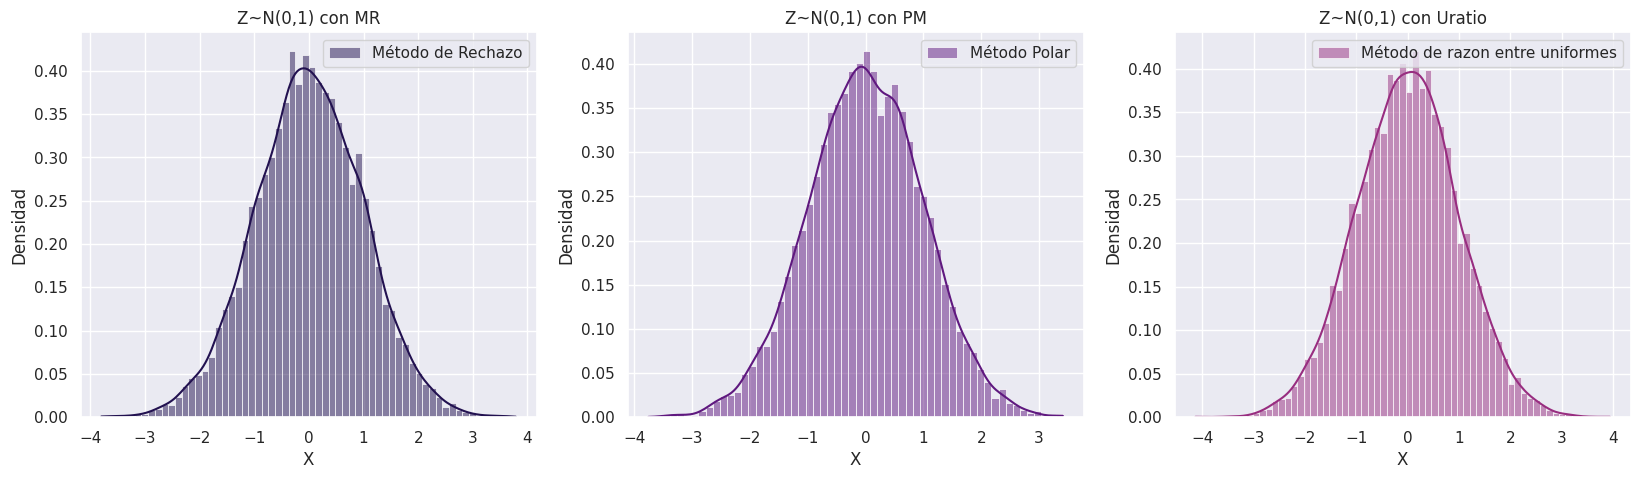

In [17]:
Nsim = 10_000
ZMR_samples = [ZMR(mu=0, sigma=1) for _ in range(Nsim)]
PolarM_samples = [PolarMethod(mu=0, sigma=1)[1] for _ in range(Nsim)]
Uratio_samples = [Uratio(mu=0, sigma=1) for _ in range(Nsim)]

pallete = sns.color_palette("magma")

fig, axes = plt.subplots(1,3, figsize=(20,5))
sns.histplot(ZMR_samples, stat='density', color=pallete[0], ax=axes[0], label="Método de Rechazo", kde=True)
axes[0].set_title("Z~N(0,1) con MR")
axes[0].legend()
axes[0].set_xlabel("X")
axes[0].set_ylabel("Densidad")

sns.histplot(PolarM_samples, stat='density', color=pallete[1], ax=axes[1], label="Método Polar", kde=True)
axes[1].set_title("Z~N(0,1) con PM")
axes[1].legend()
axes[1].set_xlabel("X")
axes[1].set_ylabel("Densidad")

sns.histplot(Uratio_samples, stat='density', color=pallete[2], ax=axes[2], label="Método de razon entre uniformes", kde=True)
axes[2].set_title("Z~N(0,1) con Uratio")
axes[2].legend()
axes[2].set_xlabel("X")
axes[2].set_ylabel("Densidad")


plt.show()
